<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.2 *The Perceptron*

The perceptron is the basic unit of a neural network. It learns by adjusting the weights applied to each of its inputs until the error at its output is minimised.

The example in this lab uses the stochastic gradient descent (SGD) algorithm to optimise the weights of a perceptron applied to a 2D classification problem.

In [12]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Dataset

The training dataset has 2 numeric features (X is 2D) and a binary response (y = +/-1):

In [27]:
X = np.array([[-2, 4], [4, 1], [1, 6], [2, 4], [6, 2]])
y = np.array([-1, -1, 1, 1, 1])

Here is the training data, along with a candidate hyperplane that separates the classes:

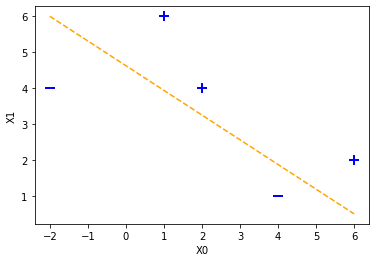

In [26]:
def plotData(X):
    for d, sample in enumerate(X):
        # Plot the negative samples
        if d < 2:
            plt.scatter(sample[0], sample[1], s = 120, marker = '_', color = 'blue', linewidths = 2)
        # Plot the positive samples
        else:
            plt.scatter(sample[0], sample[1], s = 120, marker = '+', color = 'blue', linewidths = 2)
    plt.xlabel('X0')
    plt.ylabel('X1')

plotData(X)

# Print a possible hyperplane, that is separating the two classes:
plt.plot([-2, 6], [6, 0.5], color = 'orange', linestyle = 'dashed')

# Bias

The activation function is based on the dot product of weights and inputs, and add bias to the summation value.

We need to include a bias term (-1) in the X array. This will transform the decision boundary so that the sign of the dot product of any data point with the weights vector (represented by ⟨x[i], w⟩ in code commments, below) will determine class membership: 

In [29]:
X = np.array([ [-2, 4, -1], [4, 1, -1], [1, 6, -1], [2, 4, -1], [6, 2, -1]])

In [30]:
X

array([[-2,  4, -1],
       [ 4,  1, -1],
       [ 1,  6, -1],
       [ 2,  4, -1],
       [ 6,  2, -1]])

# Stochastic Gradient Descent

Here is a simple implementation of the stochastic gradient descent algorithm for computing the weights:

In [5]:
def perceptron_sgd(Xt, Yt, eta = 1, epochs = 20):
    
    # Initialize the weight vector for the perceptron with zeros:
    wt = np.zeros(len(Xt[0]))
    
    for t in range(epochs):
        
        # Iterate over each sample in the data set:
        for i, x in enumerate(Xt):
            
            # Test for misclassification: y * ⟨x[i], w⟩ <= 0:
            if (np.dot(Xt[i], wt) * Yt[i]) <= 0:
                
                # Update weights:
                wt = wt + eta * Xt[i] * Yt[i]

    return wt

# +ve = classified correctly
# -ve = classified wrongly
# both dot product and Yt[i] needs to be same sign for it to be correctly classed


# Epochs = 10

Compute the weights using default learning rate (eta = 1) and number of epochs = 10:

In [32]:
w = perceptron_sgd(X, y, epochs = 10)
print(w)

[3. 4. 9.]


Did it work? Let's check the decision boundary (hyperplane) and try some predictions:

[[ 3.  4. -4.  3.]
 [ 3.  4.  4. -3.]]
(3.0, 3.0) (4.0, 4.0) (-4.0, 4.0) (3.0, -3.0)


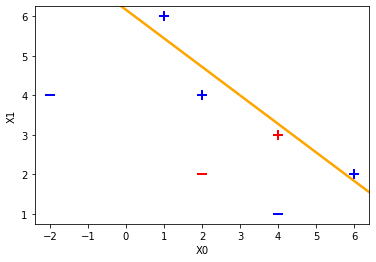

In [36]:
def plotHyperplane(wt):
    
    # Nb. Plotting the hyperplance uses some complex tricks ...
    
    x2 = [wt[0], wt[1], -wt[1], wt[0]]
    x3 = [wt[0], wt[1], wt[1], -wt[0]]
    x2x3 = np.array([x2, x3])
    print(x2x3)
    Xp, yp, U, V = zip(*x2x3) #* unpacks x2x3 into zip(x2,x3) from np.array([x2,x3])
    print(Xp, yp, U, V)
    ax = plt.gca()
    ax.quiver(Xp, yp, U, V, scale = 1, color = 'orange')
    
plotData(X)
plotHyperplane(w)

# Test samples:
plt.scatter(2, 2, s = 120, marker = '_', linewidths = 2, color = 'red')
plt.scatter(4, 3, s = 120, marker = '+', linewidths = 2, color = 'red')    

In [34]:
help(plt.gca)

Help on function gca in module matplotlib.pyplot:

gca(**kwargs)
    Get the current axes, creating one if necessary.
    
    The following kwargs are supported for ensuring the returned axes
    adheres to the given projection etc., and for axes creation if
    the active axes does not exist:
    
    Properties:
        adjustable: {'box', 'datalim'}
        agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
        alpha: float or None
        anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
        animated: bool
        aspect: {'auto'} or num
        autoscale_on: bool
        autoscalex_on: bool
        autoscaley_on: bool
        axes_locator: Callable[[Axes, Renderer], Bbox]
        axisbelow: bool or 'line'
        box_aspect: None, or a number
        clip_box: `.Bbox`
        clip_on: bool
        clip_path: Patch or (Path, Transform) or None
        contains: unknown
        facecolor or fc: color
    

In [35]:
help(plt.quiver)

Help on function quiver in module matplotlib.pyplot:

quiver(*args, data=None, **kw)
    Plot a 2D field of arrows.
    
    Call signature::
    
      quiver([X, Y], U, V, [C], **kw)
    
    *X*, *Y* define the arrow locations, *U*, *V* define the arrow directions, and
    *C* optionally sets the color.
    
    **Arrow size**
    
    The default settings auto-scales the length of the arrows to a reasonable size.
    To change this behavior see the *scale* and *scale_units* parameters.
    
    **Arrow shape**
    
    The defaults give a slightly swept-back arrow; to make the head a
    triangle, make *headaxislength* the same as *headlength*. To make the
    arrow more pointed, reduce *headwidth* or increase *headlength* and
    *headaxislength*. To make the head smaller relative to the shaft,
    scale down all the head parameters. You will probably do best to leave
    minshaft alone.
    
    **Arrow outline**
    
    *linewidths* and *edgecolors* can be used to customize the

So, not only is one of the new test points misclassified, one of the training points is also misclassified! 

Let's a look at how the model training actually proceeds. The error at each epoch is calculated using a hinge-loss function:

[3. 4. 9.]


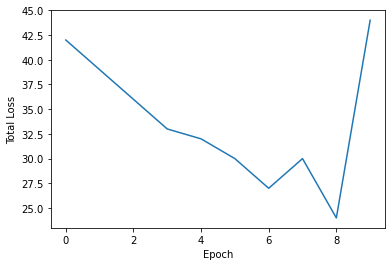

In [54]:
def perceptron_sgd_plot(Xt, Yt, eta = 1, epochs = 10):

    wt = np.zeros(len(Xt[0]))
    errors = []

    for t in range(epochs):
        total_error = 0
        for i, x in enumerate(Xt):
            if (np.dot(Xt[i], wt) * Yt[i]) <= 0:
                total_error += (np.dot(Xt[i], wt) * Yt[i])
                wt += eta * Xt[i] * Yt[i]
        errors.append(total_error * (-1))
        
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    
    return wt

print(perceptron_sgd_plot(X, y))

[ 2.  3. 13.]


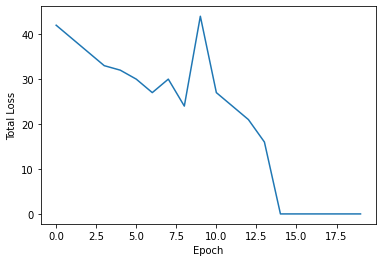

In [53]:
print(perceptron_sgd_plot(X, y,epochs=20))

# Increase the no. of epochs

So, 10 epochs clearly wasn't enough for the SGD algorithm to converge. 

Try a increasing `epochs` until the error goes to zero, then replot the test data and decision boundary:

[ 2.  3. 13.]
[[ 2.  3. -3.  2.]
 [ 2.  3.  3. -2.]]
(2.0, 2.0) (3.0, 3.0) (-3.0, 3.0) (2.0, -2.0)


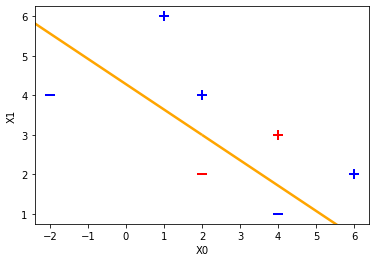

In [44]:
#?
w2 = perceptron_sgd(X, y, epochs = 15)
print(w2)
plotData(X)
plotHyperplane(w2)

# Test samples:
plt.scatter(2, 2, s = 120, marker = '_', linewidths = 2, color = 'red')
plt.scatter(4, 3, s = 120, marker = '+', linewidths = 2, color = 'red')    

In [43]:
#?


Show how to manually compute class membership for a new data point Xi = [3.5, 3.3] using just the weights determined above:

In [52]:
Xi = [3.5, 3.3,-1]
np.dot(Xi,w2)

3.8999999999999986

In [51]:
# +ve sign


[ 2.  3. 13.]
[[ 2.  3. -3.  2.]
 [ 2.  3.  3. -2.]]
(2.0, 2.0) (3.0, 3.0) (-3.0, 3.0) (2.0, -2.0)


Text(3.5, 3.3, 'new point')

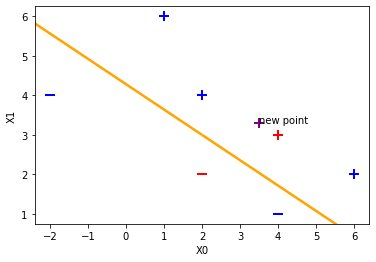

In [56]:
#TEST: make sure the training data get correctly classified:

#?
w2 = perceptron_sgd(X, y, epochs = 15)
print(w2)
plotData(X)
plotHyperplane(w2)

# Test samples:
plt.scatter(2, 2, s = 120, marker = '_', linewidths = 2, color = 'red')
plt.scatter(4, 3, s = 120, marker = '+', linewidths = 2, color = 'red') 
plt.scatter(3.5, 3.3, s = 120, marker = '+', linewidths = 2, color = 'purple')
plt.annotate("new point", [3.5, 3.3])